In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [8]:
data_train_path = 'Fruits_Vegetables/Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/Fruits_Vegetables/validation'


In [9]:
img_width = 180
img_height = 180

In [10]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=32,
    validation_split=False
)


Found 3115 files belonging to 36 classes.


In [11]:
data_cat = data_train.class_names

In [12]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size = (img_height,img_width),
                                                       batch_size=32,
                                                       shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [13]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
                                                        image_size = (img_height,img_width),
                                                        shuffle=False,
                                                        batch_size=32,
                                                        validation_split=False)

Found 359 files belonging to 36 classes.


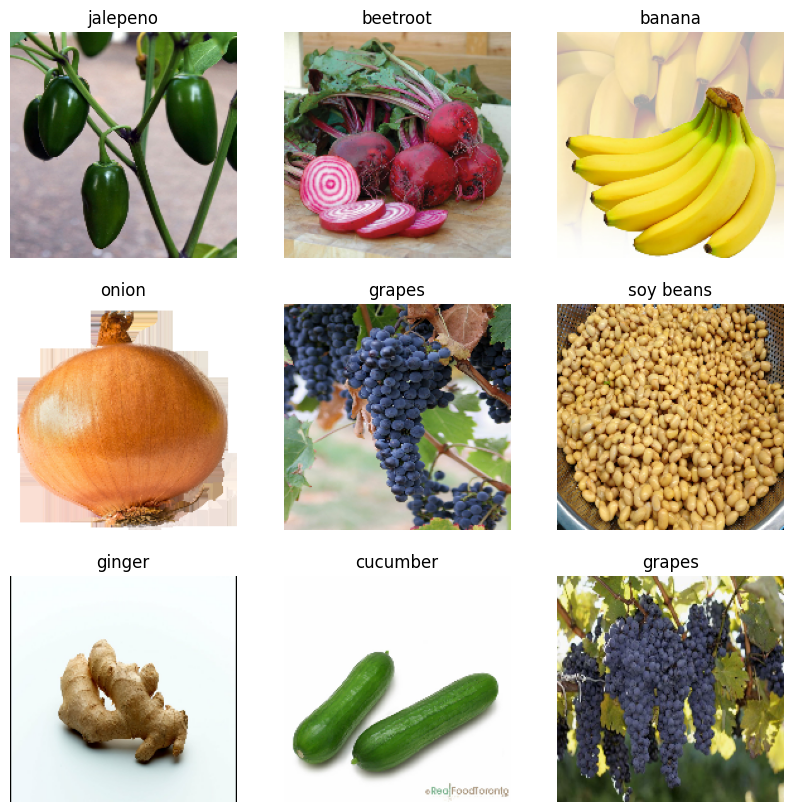

In [14]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [16]:
from tensorflow.keras.models import Sequential

In [17]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense( len(data_cat))
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [22]:
epochs_size = 25
history = model.fit(data_train,validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 71s 701ms/step - accuracy: 0.0726 - loss: 3.5964 - val_accuracy: 0.3704 - val_loss: 2.2955
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 304ms/step - accuracy: 0.2704 - loss: 2.5497 - val_accuracy: 0.5897 - val_loss: 1.5859
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 306ms/step - accuracy: 0.4314 - loss: 1.9269 - val_accuracy: 0.7721 - val_loss: 0.8682
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 309ms/step - accuracy: 0.6525 - loss: 1.1962 - val_accuracy: 0.8860 - val_loss: 0.5426
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 309ms/step - accuracy: 0.8315 - loss: 0.6584 - val_accuracy: 0.8917 - val_loss: 0.5280
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 304ms/step - accuracy: 0.9169 - loss: 0.3677 - val_accuracy: 0.9345 - val_loss: 0.4105
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 307ms/step - accuracy: 0.9544 - loss: 0.2154 - val_accuracy: 0.9516 - val_loss: 0.3765
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 306ms/step - accuracy: 0.9720 - loss: 0.1553 - val_accu

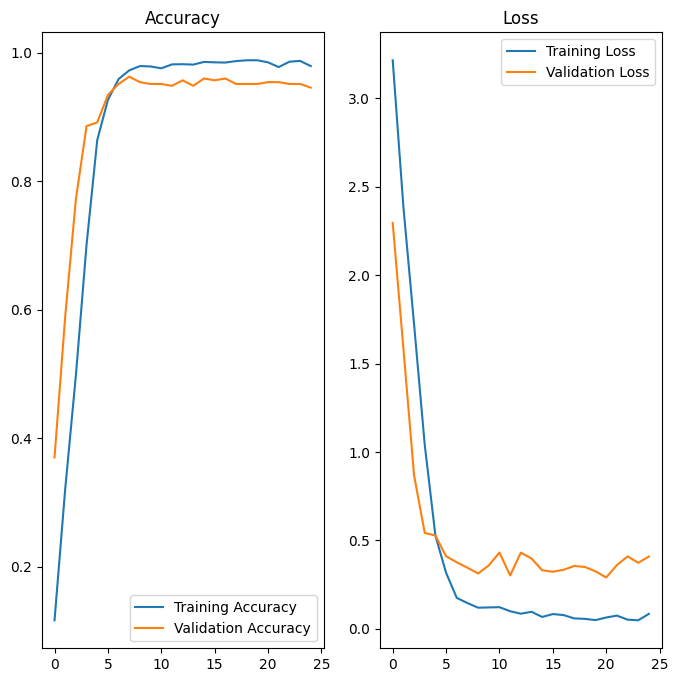

In [25]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8, 8))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)  # First subplot (1 row, 2 columns, 1st plot)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)  # Second subplot (1 row, 2 columns, 2nd plot)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')  # Correct 'lose' to 'loss'
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [26]:
image = 'Apple.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat= tf.expand_dims(img_arr,0)

In [27]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


In [28]:
score = tf.nn.softmax(predict)